In [60]:
#!pip install dask
#!pip install dask-ml
#!pip install seaborn
#!pip install statsmodels

In [1]:
import dask
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

def perform_tasks_with_dask(file_pattern, num_workers=16, threads_per_worker=12, use_gpu=True):
    """
    Perform tasks using Dask, such as reading CSV files, configuring Dask, and printing the first 5 rows.

    :param file_pattern: A file pattern to match CSV files.
    :param num_workers: The number of Dask workers to use.
    :param threads_per_worker: The number of threads per Dask worker.
    :param use_gpu: Whether to use GPU for Dask computations.
    :return: A Dask DataFrame containing the data.
    """
    dask.config.set(scheduler='threads', num_workers=num_workers, threads_per_worker=threads_per_worker, use_gpu=use_gpu)

    df = dd.read_csv(file_pattern, assume_missing=True, header=0)
    df = df.reset_index()
    return df
    # numero_de_filas_exacto = len(df)
    # print("Número de filas exacto:", numero_de_filas_exacto)

if __name__ == "__main__":
    #file_pattern = "../../Data/TMP_Data/*.csv"
    file_pattern = "../../Data/EC_Data/*.csv"
    df = perform_tasks_with_dask(file_pattern)
    print(df.compute().head(5))

   index  time  col1_boolean  col2_boolean  col3_boolean  col4_boolean  \
0      0   0.0           0.0           0.0           0.0           0.0   
1      1   0.0           0.0           0.0           0.0           0.0   
2      2   0.0           0.0           0.0           0.0           0.0   
3      3   0.0           0.0           0.0           0.0           0.0   
4      4   0.0           0.0           0.0           0.0           0.0   

   col5_float  col6_float  col7_float  col8_float  ...  col27_float  \
0    0.000000    0.000000     0.00000     0.00000  ...        101.0   
1  -30.588482  -30.588482     0.00000     0.00000  ...        100.0   
2  -30.588482  -30.588482     0.00000     0.00000  ...        100.0   
3   -8.818190   -8.818190   390.14389   390.14389  ...        100.0   
4   -8.818190   -8.818190   390.14389   390.14389  ...        100.0   

   col28_float  stableCruise_boolean  stableCruise_boolean.1  col31_integer  \
0        101.0                   0.0             

In [62]:
def calculate_descriptive_stats(dataframe, column_names):
    """
    Calculate descriptive statistics for the specified columns of a DataFrame.

    :param dataframe: A pandas DataFrame containing the data.
    :param column_names: A list of column names for which statistics will be calculated.
    :return: A dictionary containing the following statistics:
        - 'mean': Mean of the specified columns.
        - 'median': Median of the specified columns.
        - 'min': Minimum value of the specified columns.
        - 'max': Maximum value of the specified columns.
        - 'range': Range (max - min) of the specified columns.
        - 'variance': Variance of the specified columns.
        - 'standard_deviation': Standard deviation of the specified columns.
    """
    stats = {
        'mean': dataframe[column_names].mean(),
        'median': dataframe[column_names].compute().median(),
        'min': dataframe[column_names].min(),
        'max': dataframe[column_names].max(),
        'range': (dataframe[column_names].max() - dataframe[column_names].min()),
        'variance': dataframe[column_names].var(),
        'standard_deviation': dataframe[column_names].std()
    }

    # Compute all the statistics in one go
    stats = dask.compute(stats)  # Compute the entire dictionary

    # Return the computed statistics
    return stats


In [4]:
def plot_histograms(dataframe, column_names):
    """
    Plot histograms for specified columns of a DataFrame using Seaborn.

    :param dataframe: A Dask DataFrame containing the data.
    :param column_names: A list of column names for which histograms will be plotted.
    """
    columns_to_plot = dataframe[column_names]  # This is still a Dask DataFrame, no need to compute yet

    # Set the Seaborn style
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

    # Create histograms for each column
    for i, column_name in enumerate(column_names):
        row, col = i // 3, i % 3  # Calculate the subplot grid location
        sns.histplot(data=columns_to_plot[column_name].compute(), kde=True, ax=axes[row, col])
        axes[row, col].set_title(f"{column_name} Histogram")

    # Adjust layout
    plt.tight_layout()

    # Show the histograms
    plt.show()


In [10]:
columnsToAnalyze = ['col31_integer', 'col32_integer', 'col33_integer', 'col34_integer', 'col35_integer', 'col36_integer']
columnsToAnalyzePairs = ['col35_integer']
def analyze_missing_data(dataframe, column_names):
    """
    Analyze missing data (NaN) in specific columns of a Dask DataFrame.

    :param dataframe: A Dask DataFrame containing the data.
    :param column_names: A list of column names to analyze for missing data.
    """
    # Select specific columns from the Dask DataFrame
    testDF = dataframe[column_names]

    # Calculate the percentage of NaN in each column
    totalNan = (testDF.isna().mean() * 100).compute()

    # Print the results
    for column, percentage in totalNan.items():
        print(f"{column}: {percentage:.2f}%")

In [65]:
# Calculate descriptive statistics for the specified columns
stats_result = calculate_descriptive_stats(df, columnsToAnalyze)

# Print the statistics
print(stats_result)

({'mean': col31_integer    6.222222
col32_integer    6.222222
col33_integer    6.222222
col34_integer    6.222222
col35_integer    4.222222
col36_integer    4.222222
dtype: float64, 'median': col31_integer    6.0
col32_integer    6.0
col33_integer    6.0
col34_integer    6.0
col35_integer    4.0
col36_integer    4.0
dtype: float64, 'min': col31_integer    0.0
col32_integer    0.0
col33_integer    0.0
col34_integer    0.0
col35_integer    4.0
col36_integer    4.0
dtype: float64, 'max': col31_integer    14.0
col32_integer    14.0
col33_integer    14.0
col34_integer    14.0
col35_integer     6.0
col36_integer     6.0
dtype: float64, 'range': col31_integer    14.0
col32_integer    14.0
col33_integer    14.0
col34_integer    14.0
col35_integer     2.0
col36_integer     2.0
dtype: float64, 'variance': col31_integer    26.444444
col32_integer    26.444444
col33_integer    26.444444
col34_integer    26.444444
col35_integer     0.444444
col36_integer     0.444444
dtype: float64, 'standard_devia

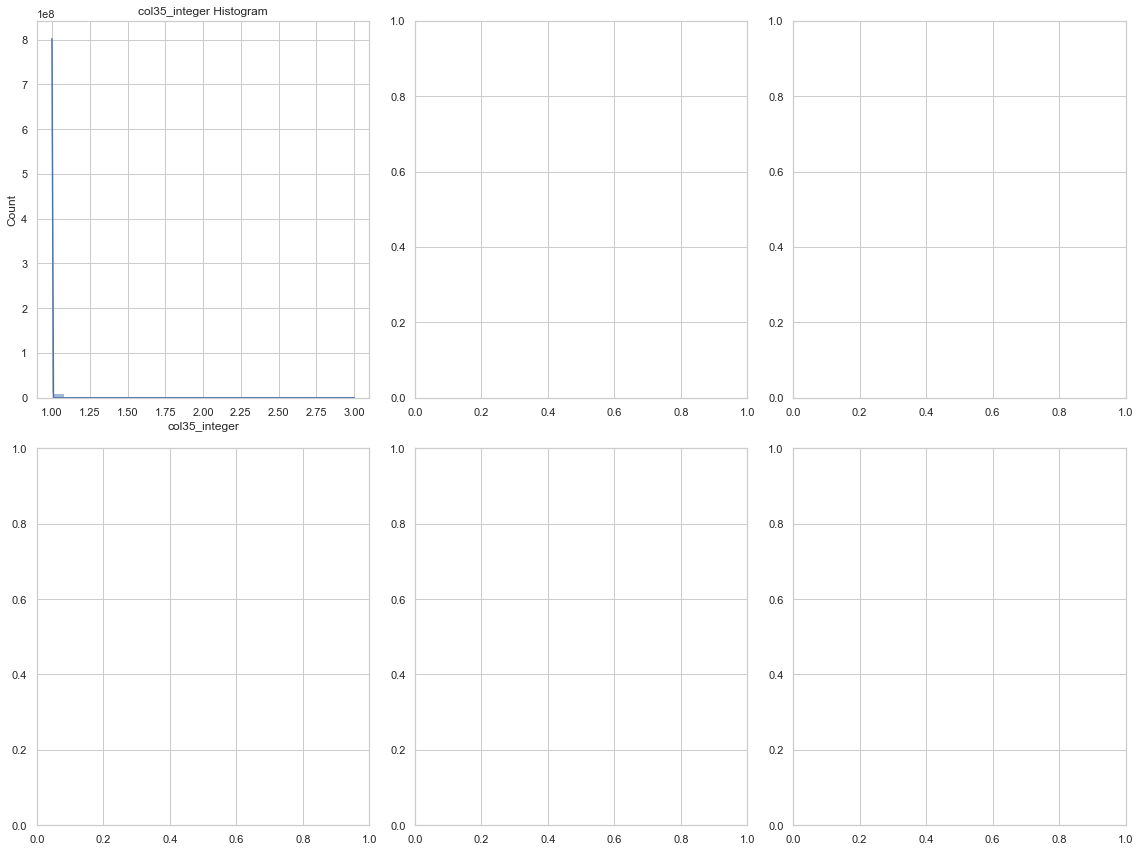

In [11]:
plot_histograms(df, columnsToAnalyzePairs)

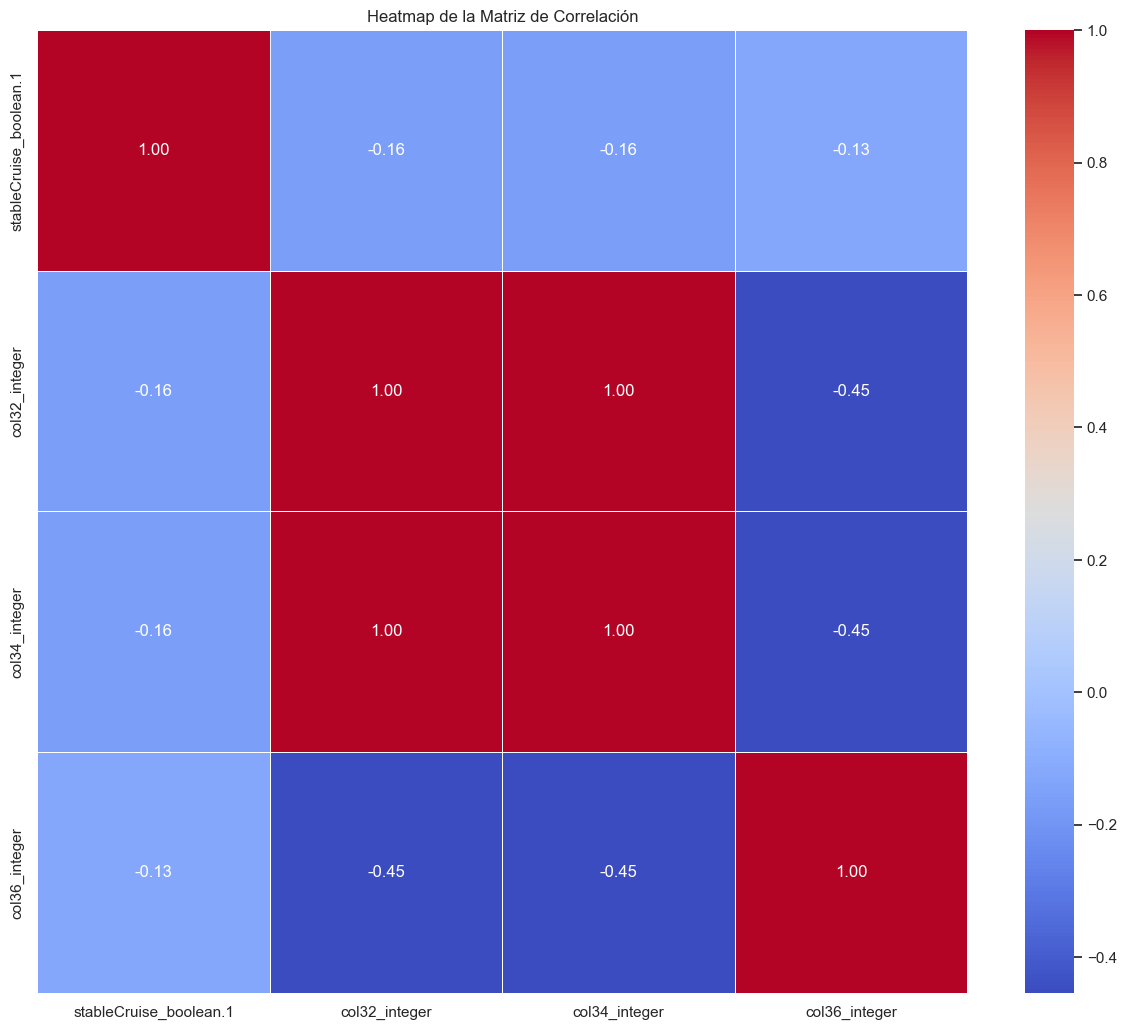

In [67]:
# Columns to analyze
columnsToAnalyze = ['stableCruise_boolean', 'stableCruise_boolean.1', 'col31_integer', 'col32_integer', 'col33_integer', 'col34_integer', 'col35_integer', 'col36_integer']
columnsToAnalyzePairs = ['stableCruise_boolean.1', 'col32_integer', 'col34_integer', 'col36_integer']

# Select the specified columns using Dask
testStableCruise = df[columnsToAnalyzePairs]

# Compute the correlation matrix directly into a Pandas DataFrame
correlationMatrixPandas = testStableCruise.corr().compute()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap with Seaborn
plt.figure(figsize=(15, 12.5))
sns.heatmap(correlationMatrixPandas, annot=True, cmap='coolwarm', linewidths=0.4, fmt='.2f')
plt.title('Heatmap of the Correlation Matrix')
plt.show()

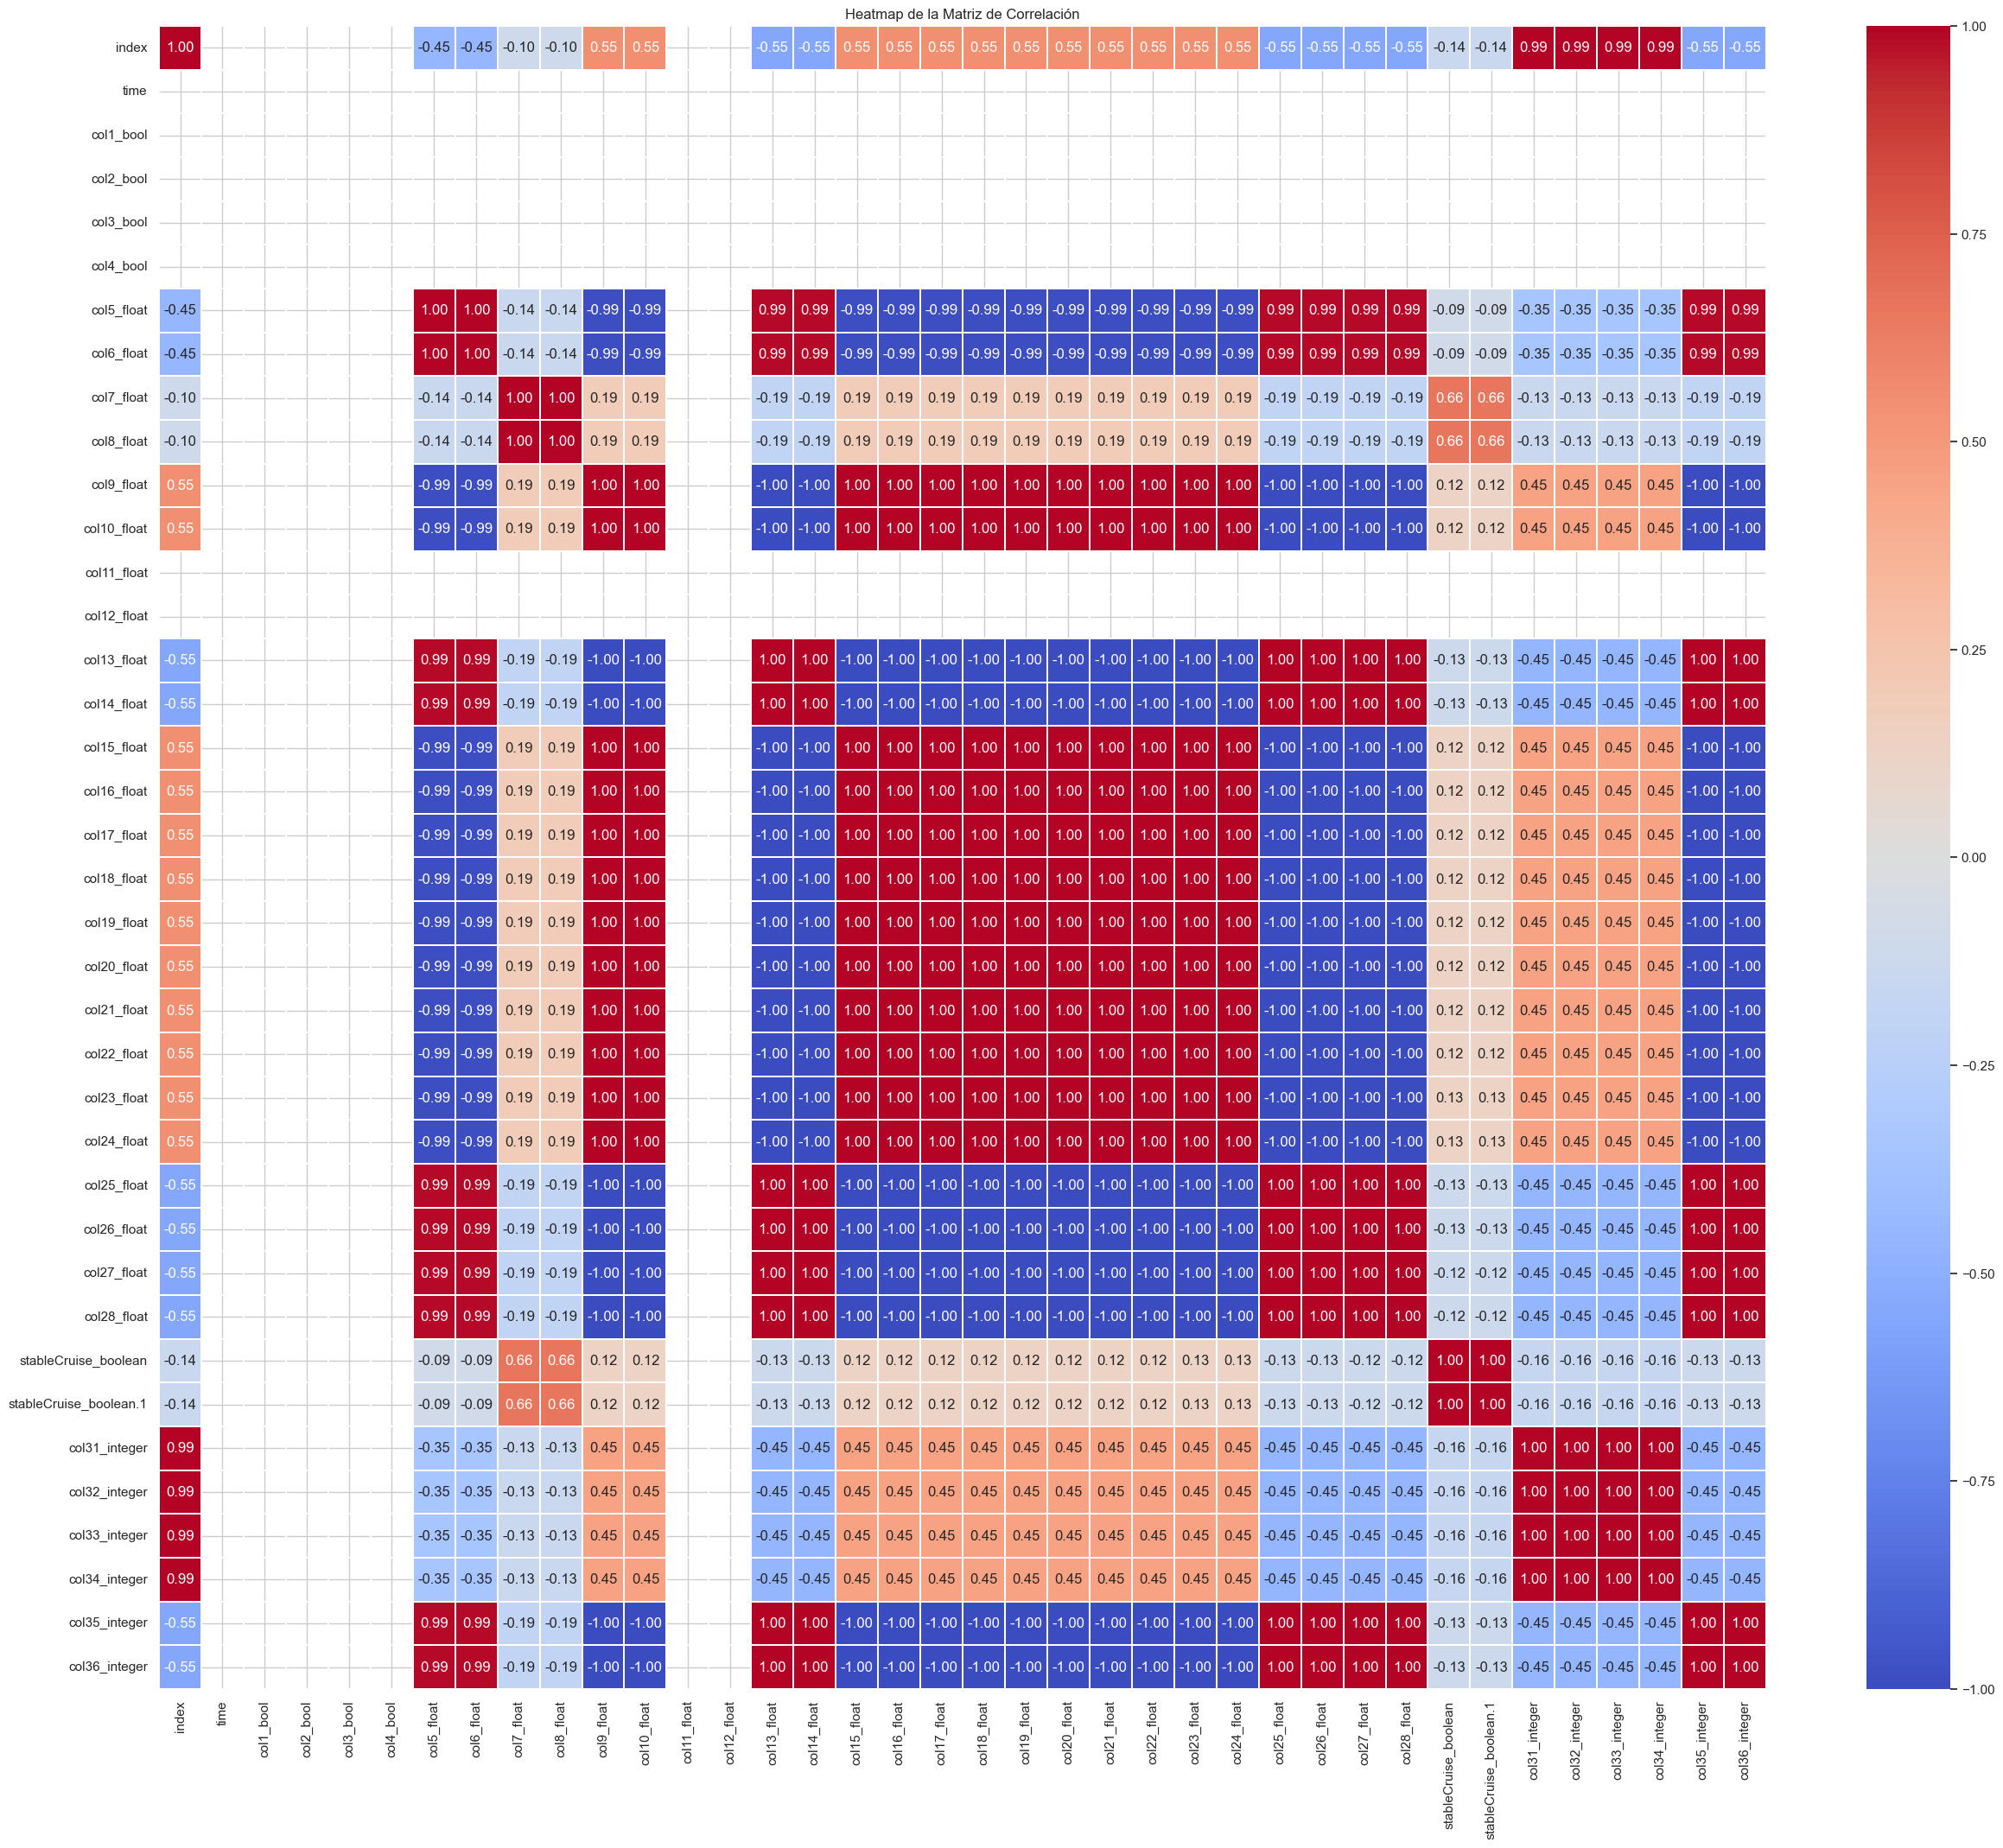

In [68]:
# Compute the correlation matrix directly into a Pandas DataFrame
correlationMatrixPandas = df.corr().compute()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap with Seaborn
plt.figure(figsize=(30, 25))
sns.heatmap(correlationMatrixPandas, annot=True, cmap='coolwarm', linewidths=0.3, fmt='.2f')
plt.title('Heatmap of the Correlation Matrix')
plt.show()

In [69]:
# Compute the Dask DataFrame to Pandas
df_pd = df.compute()

# Define the target variable and the features for VIF
target_variable = 'stableCruise_boolean'
features = [
    'time',
    'col1_bool',
    'col2_bool',
    'col3_bool',
    'col4_bool',
    'col5_float',
    'col6_float',
    'col7_float',
    'col8_float',
    'col9_float',
    'col10_float',
    'col11_float',
    'col12_float',
    'col13_float',
    'col14_float',
    'col15_float',
    'col16_float',
    'col17_float',
    'col18_float',
    'col19_float',
    'col20_float',
    'col21_float',
    'col22_float',
    'col23_float',
    'col24_float',
    'col25_float',
    'col26_float',
    'col27_float',
    'col28_float',
    'stableCruise_boolean',
    'stableCruise_boolean.1',
    'col31_integer',
    'col32_integer',
    'col33_integer',
    'col34_integer',
    'col35_integer',
    'col36_integer'
]

# Create a design matrix including an intercept
X = df_pd[features]
X = sm.add_constant(X)

# Calculate VIF using variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter the VIF results for the features (exclude 'const')
vif_results = vif_data[vif_data["Variable"] != 'const']

# Print the VIF results
print(vif_results)

                  Variable  VIF
1                     time  NaN
2                col1_bool  NaN
3                col2_bool  NaN
4                col3_bool  NaN
5                col4_bool  NaN
6               col5_float  inf
7               col6_float  inf
8               col7_float  inf
9               col8_float  inf
10              col9_float  inf
11             col10_float  inf
12             col11_float  NaN
13             col12_float  NaN
14             col13_float  inf
15             col14_float  inf
16             col15_float  inf
17             col16_float  inf
18             col17_float  inf
19             col18_float  inf
20             col19_float  inf
21             col20_float  inf
22             col21_float  inf
23             col22_float  inf
24             col23_float  inf
25             col24_float  inf
26             col25_float  inf
27             col26_float  inf
28             col27_float  inf
29             col28_float  inf
30    stableCruise_boolean  inf
31  stab

c:\Users\cris_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\cris_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\cris_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [74]:
# Dependent variable
dependent_variable = 'stableCruise_boolean'

# List of boolean variables
boolean_variables = ['col1_boolean', 'col2_boolean', 'col3_boolean', 'col4_boolean']

# Perform independence tests for each boolean variable
for variable in boolean_variables:
    # Contingency table (observed frequency)
    contingency_table = pd.crosstab(df_pd[variable], df_pd[dependent_variable])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the test result
    print(f"Boolean variable: {variable}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequency:")
    print(expected)
    print("-" * 50)
    
    # You can compare the p-value with a significance threshold, e.g., 0.05
    if p < 0.05:
        print(f"The variable {variable} is significantly related to {dependent_variable}.")
    else:
        print(f"There is no significant evidence of a relationship between {variable} and {dependent_variable}.")
    print("=" * 50)

Variable booleana: col1_bool
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0
Frecuencia esperada:
[[8. 1.]]
--------------------------------------------------
No hay evidencia significativa de relación entre col1_bool y stableCruise_boolean.
Variable booleana: col2_bool
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0
Frecuencia esperada:
[[8. 1.]]
--------------------------------------------------
No hay evidencia significativa de relación entre col2_bool y stableCruise_boolean.
Variable booleana: col3_bool
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0
Frecuencia esperada:
[[8. 1.]]
--------------------------------------------------
No hay evidencia significativa de relación entre col3_bool y stableCruise_boolean.
Variable booleana: col4_bool
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0
Frecuencia esperada:
[[8. 1.]]
--------------------------------------------------
No hay evidencia significativa de r